In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
# Importing the required libraries
import numpy as np     # Library for working with arrays and mathematical functions.
import matplotlib.pyplot as plt  # Library for generating plots and visualizing data.
from utils import temana as tm  # 'temana' module, for working with interpolation or spline functions.

In [3]:
# In this section, we generate the simulation domain for our project.  

# `x`: This array represents the main simulation domain, with 5000 points evenly spaced between 0 and \(4\pi\).  
# `xm`: This array represents a reduced version of the simulation domain, with 1000 points evenly spaced between 0 and \(4\pi\).  

# Generate the full simulation domain with 5000 points
x = np.linspace(0, 4 * np.pi, 5000)

# Generate a reduced simulation domain with 1000 points
xm = np.linspace(0, 4 * np.pi, 1000)

In [4]:
# In this step, we generate a database of signals with added noise. Each signal is computed for both the full simulation domain (`x`) and the reduced domain (`xm`). The results are stored in separate lists for further processing:  

# `signal`: Contains the generated signals for the full domain.  
# `sample`: Contains the corresponding signals for the reduced domain.  

signal = []  # List to store signals for the full domain
sample = []  # List to store signals for the reduced domain

for i in range(1000):  # Generate 1000 signals
    y, ym = tm.generate_variable_amplitude_signal(x, xm)  # Generate signal with noise
    signal.append(y)  # Store the full-domain signal
    sample.append(ym)  # Store the reduced-domain signal

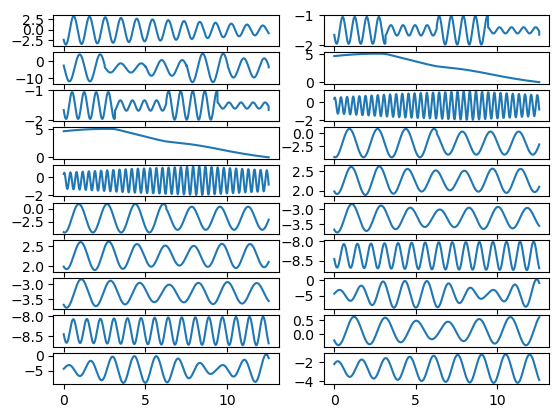

In [5]:
# This section demonstrates how to visualize the signals stored in the `signal` list.

# Create a 10x2 grid of subplots
fig, ax = plt.subplots(nrows=10, ncols=2)
a = 138  # Starting index for signal visualization

# Loop through the grid to plot signals
for j in range(2):  # Iterate over columns
    for i in range(10):  # Iterate over rows
        ax[i, j].plot(x, signal[a + 2 * j + i])  # Plot signal on the full domain
        # Uncomment the following line to overlay the reduced-domain signals
        # ax[i, j].plot(xm, sample[a + 2 * j + i], color='red')

In [7]:
# Load the signal data from text files using numpy
# These files contain sample values for two types of signals (super and sub)

# Load the super signal values from 'SignalAV_Super_SampleVal.txt'
signal_super = np.loadtxt('../results/samples/samplesx10000_5000/SignalAV_Super_SampleVal.txt')

# Load the sub signal values from 'SignalAV_Sub_SampleVal.txt'
signal_sub = np.loadtxt('../results/samples/samplesx10000_5000/SignalAV_Sub_SampleVal.txt')

In [8]:
# Generate the signal dataset with noise

# Initialize empty lists to store the data
signal = []  # List to store the original signal values
sample = []  # List to store the sample values for the signal
noise = []  # List to store the noise values
noise_sample = []  # List to store the noise values for the sample
signal_with_noise = []  # List to store the signal with added noise
signal_with_noise_sample = []  # List to store the sample signal with added noise

# Loop to generate the data 750 times
for i in range(750):
    # Generate the signal and sample signal
    y, ym = tm.generate_signal(x, xm)
    
    # Generate the noise and sample noise
    r, rm = tm.generate_noise(x, xm)
    
    # Add the noise to the signal and sample signal
    yr = y + r
    yrm = ym + rm
    
    # Append the generated values to the corresponding lists
    signal.append(y)
    sample.append(ym)
    noise.append(r)
    noise_sample.append(rm)
    signal_with_noise.append(yr)
    signal_with_noise_sample.append(yrm)
